In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving d1.csv to d1.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['d1.csv']))

In [ ]:
df2

,V1,V2,V3,V4,V5,V6,V7,Class
0,0,1,1,0,1,1,1,1
1,1,1,1,0,0,1,1,1
2,1,1,1,0,1,1,1,1
3,1,1,1,0,1,1,1,1
4,0,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...
495,1,1,1,1,0,1,1,10
496,0,1,1,1,0,1,0,5
497,1,1,0,1,0,1,1,6
498,1,1,1,0,0,1,0,5


In [ ]:
#creating files

In [ ]:
sha=df2.shape

In [ ]:
df2.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
Class    0
dtype: int64

In [ ]:
df2.describe()

,V1,V2,V3,V4,V5,V6,V7,Class
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.726000,0.590000,0.734000,0.662000,0.396000,0.818000,0.670000,5.648000
std,0.446456,0.492326,0.442307,0.473502,0.489554,0.386231,0.470684,2.806394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [ ]:
df2['V1'].value_counts()

1    363
0    137
Name: V1, dtype: int64

In [ ]:
df2['V2'].value_counts()

1    295
0    205
Name: V2, dtype: int64

In [ ]:
df2['V3'].value_counts()

1    367
0    133
Name: V3, dtype: int64

In [ ]:
df2['V4'].value_counts()

1    331
0    169
Name: V4, dtype: int64

In [ ]:
df2['V5'].value_counts()

0    302
1    198
Name: V5, dtype: int64

In [ ]:
df2['V6'].value_counts()

1    409
0     91
Name: V6, dtype: int64

In [ ]:
df2['V7'].value_counts()

1    335
0    165
Name: V7, dtype: int64

In [ ]:
df2['Class'].value_counts()

8     57
4     57
9     53
6     52
5     52
3     51
10    49
7     47
1     45
2     37
Name: Class, dtype: int64

In [ ]:
si=df2.groupby('Class').size()

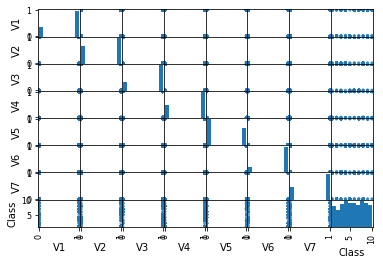

In [ ]:
pd.plotting.scatter_matrix(df2)
plt.show()

V1          AxesSubplot(0.125,0.125;0.0824468x0.755)
V2       AxesSubplot(0.223936,0.125;0.0824468x0.755)
V3       AxesSubplot(0.322872,0.125;0.0824468x0.755)
V4       AxesSubplot(0.421809,0.125;0.0824468x0.755)
V5       AxesSubplot(0.520745,0.125;0.0824468x0.755)
V6       AxesSubplot(0.619681,0.125;0.0824468x0.755)
V7       AxesSubplot(0.718617,0.125;0.0824468x0.755)
Class    AxesSubplot(0.817553,0.125;0.0824468x0.755)
dtype: object

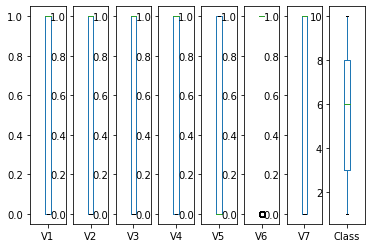

In [ ]:
#BOX PLOTTING: SHOWS THE MEAN VALUE AND OUTLIERS OUTSIDE THE BOX
df2.plot(kind='box',subplots=True,sharex=False,sharey=False)

<Figure size 1080x720 with 0 Axes>

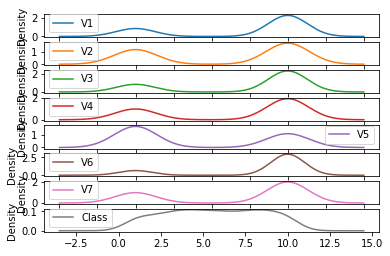

In [ ]:
plt.figure(figsize=(15,10))
df=pd.DataFrame(df2[['V1','V2','V3','V4','V5','V6','V7','Class']])
df.plot(kind='density',subplots=True,sharex=False)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
df3= df2.copy()
df3= df3.apply(LabelEncoder().fit_transform)
df3.head()

,V1,V2,V3,V4,V5,V6,V7,Class
0,0,1,1,0,1,1,1,0
1,1,1,1,0,0,1,1,0
2,1,1,1,0,1,1,1,0
3,1,1,1,0,1,1,1,0
4,0,0,1,0,0,1,0,1


In [ ]:
ss= StandardScaler().fit(df3.drop('Class', axis=1))

In [ ]:
X= ss.transform(df3.drop('Class', axis=1))
y= df3['Class']
X

array([[-1.62776996,  0.83361577,  0.60199487, ...,  1.23501114,
         0.47169258,  0.70181003],
       [ 0.61433742,  0.83361577,  0.60199487, ..., -0.80970929,
         0.47169258,  0.70181003],
       [ 0.61433742,  0.83361577,  0.60199487, ...,  1.23501114,
         0.47169258,  0.70181003],
       ...,
       [ 0.61433742,  0.83361577, -1.66114373, ..., -0.80970929,
         0.47169258,  0.70181003],
       [ 0.61433742,  0.83361577,  0.60199487, ..., -0.80970929,
         0.47169258, -1.42488702],
       [ 0.61433742,  0.83361577,  0.60199487, ...,  1.23501114,
         0.47169258,  0.70181003]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
from sklearn.linear_model import Ridge
rid=Ridge(alpha=1.0)
rid.fit(X_train,y_train)
y_pred_train=rid.predict(X_train)
y_pred_test=rid.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
print('RIDGE : MSE Train=%.3f, MSE Test=%.3f'%
      (mean_squared_error(y_train,y_pred_train),(mean_squared_error(y_test,y_pred_test))))
print('RIDGE : R2 Score Train=%.3f, R2Score Test=%.3f'%
      (r2_score(y_train,y_pred_train),(r2_score(y_test,y_pred_test))))

RIDGE : MSE Train=6.127, MSE Test=6.719
RIDGE : R2 Score Train=0.192, R2Score Test=0.206


In [ ]:
from sklearn.linear_model import Lasso
las=Lasso(alpha=1.0)
las.fit(X_train,y_train)
y_pred_train1=las.predict(X_train)
y_pred_test1=las.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
print('RIDGE : MSE Train=%.3f, MSE Test=%.3f'%
      (mean_squared_error(y_train,y_pred_train1),(mean_squared_error(y_test,y_pred_test1))))
print('RIDGE : R2_Score Train=%.3f, R2_Score Test=%.3f'%
      (r2_score(y_train,y_pred_train1),(r2_score(y_test,y_pred_test1))))

RIDGE : MSE Train=7.586, MSE Test=8.516
RIDGE : R2_Score Train=0.000, R2_Score Test=-0.006


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='steelblue',edgecolor='white',s=70)
    plt.plot(X,model.predict(X),color='black',lw=2)
    return None

tree=DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)
sort_idx=X.flatten().argsort()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
        X,y,test_size=0.2,random_state=1)
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=1000,
                             criterion='mse',random_state=1,
                             n_jobs=-1)
forest.fit(X_train,y_train)
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)
from sklearn.metrics import mean_squared_error
t_train=mean_squared_error(y_train,y_train_pred)
t_test=mean_squared_error(y_test,y_test_pred)
print('MSE Train: %.3f, MSE test: %.3f'%(t_train,t_test))
##
from sklearn.metrics import r2_score
t_train1=r2_score(y_train,y_train_pred)
t_test1=r2_score(y_test,y_test_pred)
print('R2 Score Train: %.3f, R2 Score of test: %.3f'%(t_train1,t_test1))


MSE Train: 3.326, MSE test: 6.521
R2 Score Train: 0.582, R2 Score of test: 0.127


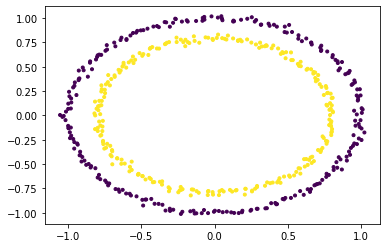

In [ ]:
# importing models of non linear svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

# generating data
X, y = make_circles(n_samples = 500, noise = 0.02)

# visualizing data
plt.scatter(X[:, 0], X[:, 1], c = y, marker = '.')
plt.show()


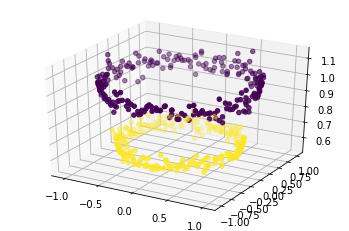

In [ ]:
# adding a new dimension to X
X1 = X[:, 0].reshape((-1, 1))
X2 = X[:, 1].reshape((-1, 1))
X3 = (X1**2 + X2**2)
X = np.hstack((X, X3))

# visualizing data in higher dimension
fig = plt.figure()
axes = fig.add_subplot(111, projection = '3d')
axes.scatter(X1, X2, X1**2 + X2**2, c = y, depthshade = True)
plt.show()

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


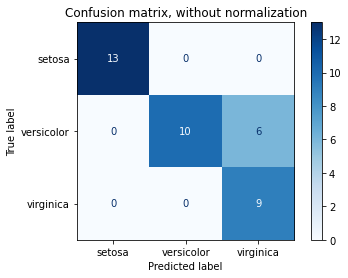

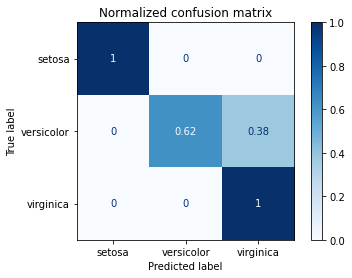

In [ ]:
#confusion matrix for svm
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#prediction 
# Importing the dependancies 
from sklearn import metrics
# Predicted values
y_pred = ["a", "b", "c", "a", "b"]
# Actual values
y_act = ["a", "b", "c", "c", "a"]
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_act, y_pred, labels=["a", "b", "c"]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_act, y_pred, labels=["a", 
"b","c"]))

[[1 1 0]
 [0 1 0]
 [1 0 1]]
              precision    recall  f1-score   support

           a       0.50      0.50      0.50         2
           b       0.50      1.00      0.67         1
           c       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.67      0.67      0.61         5
weighted avg       0.70      0.60      0.60         5



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report